# 觀察資料分布
* YELP
    * 50 review above 
    * join business, check-in and tips

# Import

In [2]:
import pandas as pd
import json
import numpy as np
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle('/home/adam/Steph_C/Data/yelp/final.pkl')

In [4]:
df.shape

(1618930, 18)

In [5]:
df.columns

Index(['business_id', 'stars_x', 'useful', 'funny', 'cool', 'text', 'date',
       'name', 'address', 'city', 'state', 'postal_code', 'stars_y',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

# EDA

In [6]:
# calculate the city number of each state
for i in Counter(df.state):
    tmp = df[df.state==i]
    print(f'State : {i} ,\
    city no. : {len(Counter(tmp.city))},\
    postal_code cnt : {len(Counter(tmp.postal_code))},\
    restaurant no. : {len(Counter(tmp.name))}')
    

State : PA ,    city no. : 143,    postal_code cnt : 163,    restaurant no. : 2123
State : TN ,    city no. : 22,    postal_code cnt : 42,    restaurant no. : 1067
State : LA ,    city no. : 18,    postal_code cnt : 41,    restaurant no. : 1047
State : FL ,    city no. : 76,    postal_code cnt : 116,    restaurant no. : 2185
State : IN ,    city no. : 18,    postal_code cnt : 53,    restaurant no. : 892
State : MO ,    city no. : 48,    postal_code cnt : 53,    restaurant no. : 752
State : NV ,    city no. : 8,    postal_code cnt : 20,    restaurant no. : 792
State : ID ,    city no. : 4,    postal_code cnt : 14,    restaurant no. : 328
State : CA ,    city no. : 7,    postal_code cnt : 12,    restaurant no. : 558
State : AZ ,    city no. : 10,    postal_code cnt : 35,    restaurant no. : 726
State : NJ ,    city no. : 81,    postal_code cnt : 66,    restaurant no. : 415
State : IL ,    city no. : 18,    postal_code cnt : 17,    restaurant no. : 57
State : DE ,    city no. : 9,    post

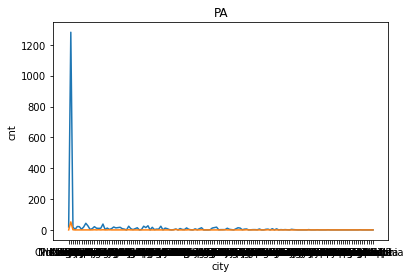

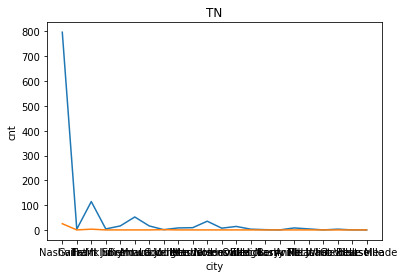

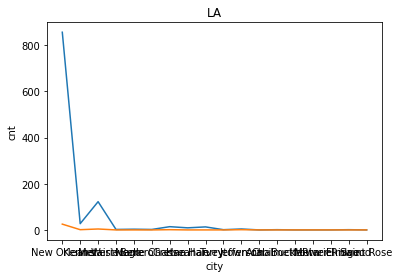

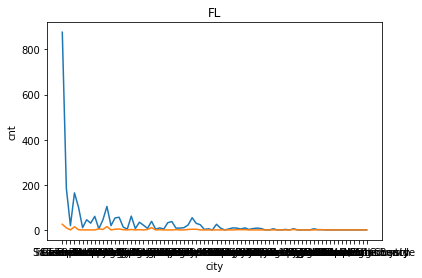

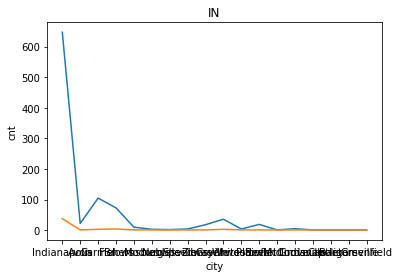

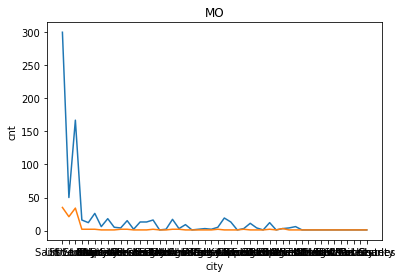

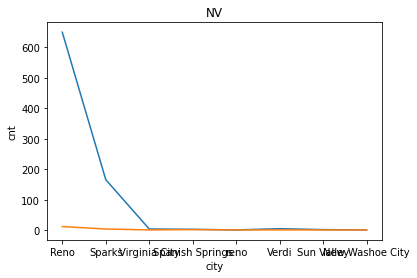

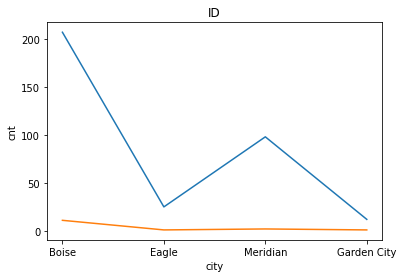

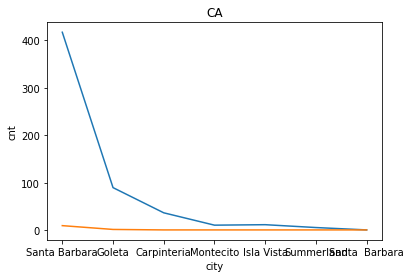

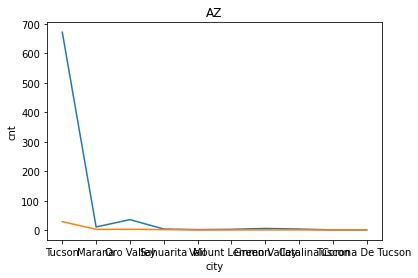

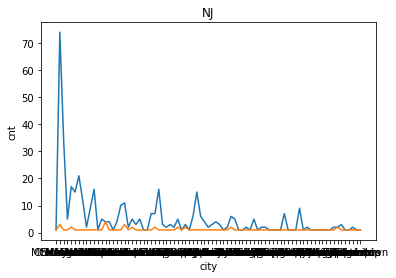

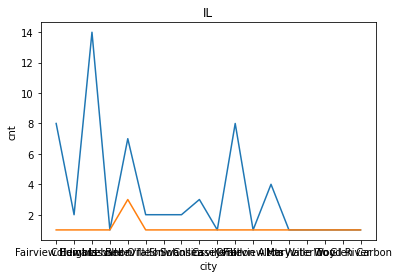

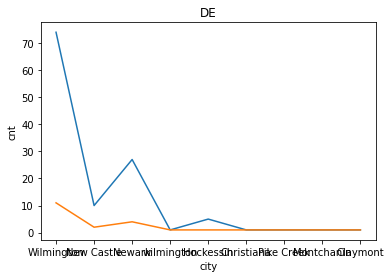

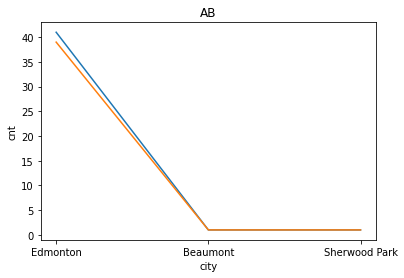

In [7]:
# Count the restaurant
cnt = 0

for state_name in Counter(df.state):
    plt.title(state_name)
    plt.xlabel('city')
    plt.ylabel('cnt')
    state = df[df.state == state_name]
    city_list = [c for c in Counter(state.city) ]
    restaurant_list = [ len(Counter(state[state.city == city_name].name)) for city_name in city_list]
    postal_code_list = [  len(Counter(state[state.city == city_name].postal_code)) for city_name in city_list]
    plt.plot(city_list, restaurant_list ,label = 'restaurant count')
    plt.plot(city_list, postal_code_list,label = 'postal code count')
    
    plt.show()


In [8]:
print(len(Counter(df.name)))

10549


In [6]:
# Count the restaurant's postal code
cnt = 0

restaurant_postal_count ={}
for i in Counter(df.name):
    tmp = df[df.name==i]
    restaurant_postal_count[i]=len(Counter(tmp.postal_code))


In [28]:
Counter(restaurant_postal_count.values()).most_common()

[(1, 9931),
 (2, 387),
 (3, 95),
 (4, 42),
 (5, 29),
 (6, 13),
 (7, 9),
 (9, 8),
 (8, 6),
 (11, 5),
 (17, 3),
 (10, 3),
 (12, 3),
 (13, 3),
 (14, 2),
 (18, 2),
 (26, 2),
 (19, 1),
 (23, 1),
 (16, 1),
 (47, 1),
 (30, 1),
 (20, 1)]

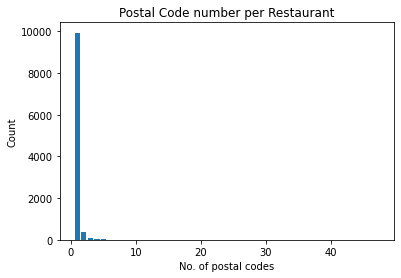

In [26]:
data = list(Counter(restaurant_postal_count).values())
c = Counter(data)
c = sorted(c.items())
months_num = [i[0] for i in c]
# month_names = [months[i[0]-1] for i in c]
freq = [i[1] for i in c]

# print(c)
# print(months)
# print(freq)


plt.bar(months_num, freq)
plt.title("Postal Code number per Restaurant")
plt.xlabel("No. of postal codes")
plt.ylabel("Count")

plt.show()

# By State
* Use FL for starters , only 7 seven cities

In [ ]:
df = df[df.state == 'FL']

In [ ]:
df.shape

In [ ]:
for_lda_df = df.copy()

In [ ]:
for_lda_df.shape

In [ ]:
# get the restaurants that has branches in at least 3 different cities
for j in Counter(df.name):
    tmp = df[df.name==j]
    if len(Counter(tmp.city))<3:
        df = df.drop(tmp.index)
        df.reset_index()

In [ ]:
df.shape

In [ ]:
for_lda_df[~for_lda_df.name.isin(df.name)]

In [ ]:
brand = Counter(df.name)
plt.bar(brand.keys(), brand.values())

In [ ]:
df.to_pickle("../Data/yelp/FL_only.pkl")  
for_lda_df.to_pickle("../Data/yelp/LDA_training.pkl")  

## Observe the Ratings by Brand

In [ ]:
# # count the cities by one brand 
# for i in Counter(df.name):
#     tmp = df[df.name==i]
#     print(Counter(tmp.city))

In [ ]:
# Count the overall std for each brand
l_= []
for i in Counter(df.name):
    tmp = df[df.name==i]
    dict_ = tmp.stars_x.describe().to_dict()
    dict_['name']=i
    l_.append(dict_)
b = pd.DataFrame(l_)
b

In [ ]:
# Count the std for each brand by city 
l_= []
for i in Counter(df.name):
    tmp = df[df.name==i]
    dict_ = tmp.stars_x.describe().to_dict()
    dict_['name']=i
    l_.append(dict_)
b = pd.DataFrame(l_)
b

## Obeserve the postal code

In [ ]:
len(Counter(df.postal_code))

In [ ]:
len(Counter(df.city))